In [21]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [22]:
import numpy as np
import matplotlib.pyplot as plt

## SOS Verification for Non-Polynomial Systems
Consider the dynamical system
\begin{align}
\dot x = - \tanh(x) + x.
\end{align}

We now try to prove stability of the above system using convex optimization and Sums of Squares (SOS).
We will follow the recasting approach presented in [1].

We define the redundant set of coordinates
\begin{align}
z_1 := \tanh(x), \quad z_2 := x
\end{align}
whose dynamics is
\begin{align}
\dot z =
\begin{bmatrix}
(1-z_1^2)(-z_1+z_2)
\\
-z_1+z_2
\end{bmatrix}
=: f(z).
\end{align}

<IPython.core.display.Javascript object>


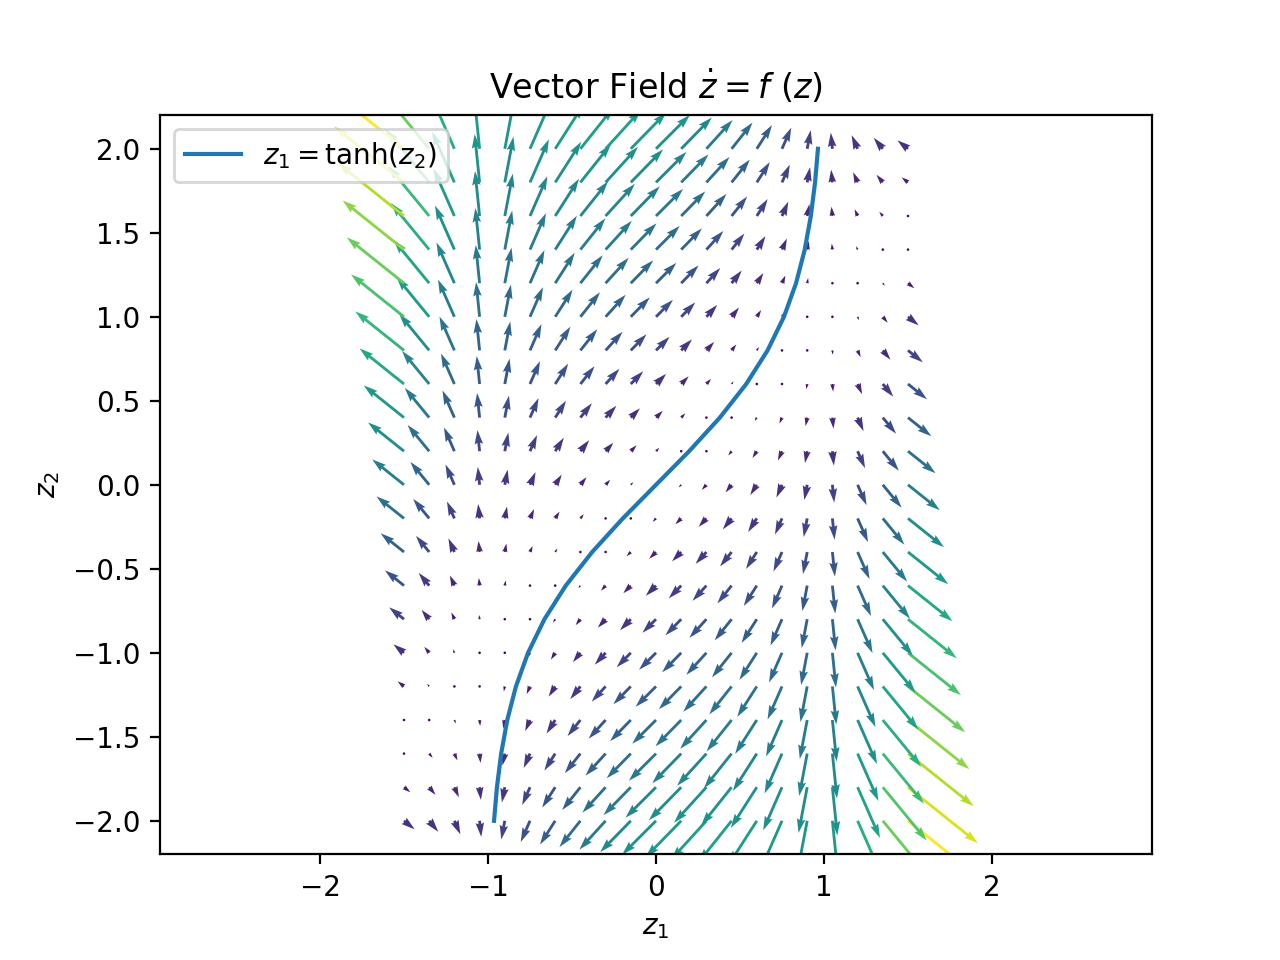

In [23]:
def f(z1, z2):
    return np.array([(1-z1**2)*(-z1+z2), (-z1+z2)])
fig = plt.figure()
n = 21
z2lim = 2
z1 = np.linspace(-1.5, 1.5, n)
z2 = np.linspace(-z2lim, z2lim, n)
plt.plot(np.tanh(z2), z2, label=r'$z_1 = \tanh (z_2)$')
Z1, Z2 = np.meshgrid(z1, z2)
F1 = np.array([f(i, j)[0] for i, j in zip(np.ravel(Z1), np.ravel(Z2))]).reshape(n, n)
F2 = np.array([f(i, j)[1] for i, j in zip(np.ravel(Z1), np.ravel(Z2))]).reshape(n, n)
M = np.hypot(F1, F2)
Q = plt.quiver(Z1, Z2, F1, F2, M)
plt.axis('equal')
plt.title(r'Vector Field $\dot z = f \ (z)$')
plt.xlabel(r'$z_1$')
plt.ylabel(r'$z_2$')
plt.legend(loc=2)
plt.show()

Through a visual inspection of the vector field, we can note that even if along the constraint set $\mathcal D$ the dynamics is asymptotically stable, the origin for the unconstrained dynamics $f(z)$ is clearly not asymptotically stable (the whole line $z_1 = 0$ is an equilibrium)! Even more: the dynamics is not even stable in $\mathcal D$!

To prove the latter statement we consider the translation of $\mathcal D$ along the $z_1$ axis
\begin{align}
z_1 = \arctan(z_2) + a,
\end{align}
with $a \in \mathbb R$. The vector field $f(z)$ is everywhere tangent to these curves: in fact, the vector normal to the curves is
\begin{align}
n(z_2) :=
\begin{bmatrix}
1
\\
\frac{- 1}{1 + z_2^2}
\end{bmatrix}
\end{align}
and $n(z_2) \cdot f(z) = 0, \forall z_1$. We can then conclude that every trajectory of the system will never cross any of the curves above; hence, choosing $a > \frac{\pi}{2}$ and $a < - \frac{\pi}{2}$, we prove that all the trajectories strarting in the set
\begin{align}
\{ z \mid z_1 > \arctan(z_2) + \frac{\pi}{2}\}
\cup
\{ z \mid z_1 < \arctan(z_2) - \frac{\pi}{2}\}
\end{align}
will diverge.

<IPython.core.display.Javascript object>


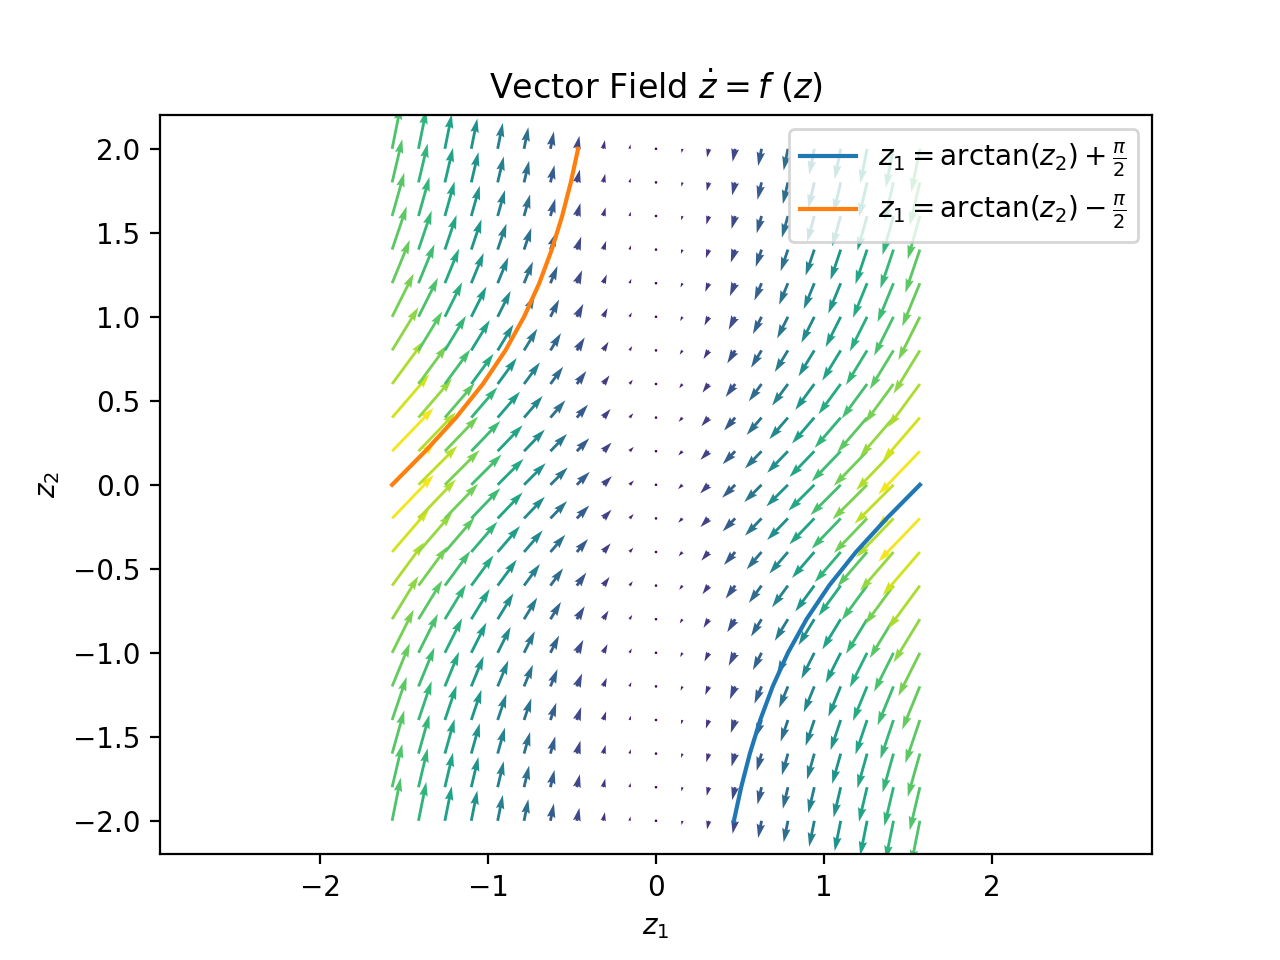

In [5]:
fig = plt.figure()
gpi2 = np.arctan(z2[:int(n/2)+1]) + np.pi/2.
gmpi2 = np.arctan(z2[int(n/2):]) - np.pi/2.
plt.plot(gpi2, z2[:int(n/2)+1], label=r'$z_1 = \arctan (z_2) + \frac{\pi}{2}$')
plt.plot(gmpi2, z2[int(n/2):], label=r'$z_1 =  \arctan (z_2) - \frac{\pi}{2}$')
Q = plt.quiver(Z1, Z2, F1, F2, M)
plt.axis('equal')
plt.title(r'Vector Field $\dot z = f \ (z)$')
plt.xlabel(r'$z_1$')
plt.ylabel(r'$z_2$')
plt.legend(loc=1)
plt.show()

## References
[1] Papachristodoulou, Prajna - Analysis of Non-polynomial Systems using the Sum of Squares Decomposition